# Bacteria and an important number

Imagine a population of bacteria, perhaps a million of them, each of which duplicates itself once per day.

We might expect the population of bacteria at the end of one day to be two million.

> Why is this not a realistic model? Does it overestimate or underestimate the number of bacteria after a day?

If all the bacteria waited one day to reproduce themselves, then two million would be right. But many of the bacteria will duplicate before that, and both they and the new bacteria will still be around for the rest of the day to possibly reproduce again.

A slightly improved model would be: half of the population reproduces every half day.

> How many bacteria will there be at the end of the day according to this new model?

At lunchtime, there would be 1.5 million bacteria - the original million, and half a million baby bacteria. At midnight, there would be those 1.5 million and half again, or 2.25 million.

In other words, $$\text{final population}=\text{starting population}\times 1\frac{1}{2} \times 1\frac{1}{2}$$

We could improve our model even further if we let a third of our bacteria reproduce every third of a day.

Then,

$$\begin{aligned}
\text{final population}&=\text{starting population}\times 1\frac{1}{3} \times 1\frac{1}{3}\times 1\frac{1}{3}\\
&=1\text{ million }\times\left(1+\frac{1}{3}\right)^3\\
&=2.37\text{ million}
\end{aligned}$$

> How could we make this model even more accurate?

If our bacteria reproduce about once a day, then one in twenty-four of them should reproduce in the first hour. Then one in twenty-four of that new population will reproduce in the second hour, and so on.

> How many bacteria will there be at the end of the day according to this model?

$$\begin{array}{lr}
\text{Hours}&\text{Population (millions)}\\
0&1\\
1&1+\frac{1}{24}\\
2&(1+\frac{1}{24})(1+\frac{1}{24})\\
3&(1+\frac{1}{24})(1+\frac{1}{24})(1+\frac{1}{24})\\
\cdots&\cdots\\
24&(1+\frac{1}{24})^{24}
\end{array}$$


So

$\begin{aligned}
\text{final population}&=\text{starting population}\left(1+\dfrac{1}{24}\right)^{24}\\
&=2.66\text{ million}
\end{aligned}$

> Write a function that takes the number of intervals and returns the number (in millions) of bacteria at the end of the day

In [106]:
def bacteria(intervals):
    return (1+1/intervals)**intervals

Check it works...

In [92]:
for i in [1,2,24]:
    print("{} bacteria from {} intervals".format(bacteria(i),i))

2.0 bacteria from 1 intervals
2.25 bacteria from 2 intervals
2.663731258068599 bacteria from 24 intervals


> Use your function to find the number of bacteria if we decrease the interval to one second

In [96]:
bacteria(86400)

If we imagined taking one second snapshots, then that's $24\cdot60\cdot60=86,400$ intervals and

$$\begin{aligned}
\text{final population}&=\text{starting population}\left(1+\dfrac{1}{86,400}\right)^{86,400}\\
&=2.718\text{ million}
\end{aligned}
$$

> Is there any reason to stop there?

The more intervals we use, the closer we get to a model in which bacteria growth is *continuous* rather than taking place in *discrete* intervals.

In other words, the better our model is, the bigger the $n$ in $\left(1+\dfrac{1}{n}\right)^n$

> What do you notice about the number of bacteria as the number of intervals increases?

For a model of continuous growth, we'd need that $n$ to get infinitely big, so the intervals get infinitely small, written

$$\lim_{n\to\infty}\left(1+\dfrac{1}{n}\right)^n$$

This number, roughly $2.718$, is important enough to get its own letter, $e$, and its own [wikipedia page](https://en.wikipedia.org/wiki/E_(mathematical_constant%29).



You might have noticed that if you put a large enough $n$ in you get an answer that is *not* $2.718$.

> Why do you think that is?

Luckily `sympy` has much higher precision arithmetic, and a `limit` function, so let's use that.

In [107]:
from sympy import *
n = Symbol('n')
init_printing()

In [113]:
limit(bacteria(n),n,oo)

Reassuring, but what's that as a decimal

In [62]:
N(limit(bacteria(x),x,oo))

## Exponential functions

Recall that functions like $y=2^x$ or $y=5^x$ are called *exponential* functions.

> Check that $f:x\longmapsto 2^x\,\{x\in\mathbb{R}\}$ really is a function. What is its range?

> Use [desmos](http://desmos.com) to explore functions of the form $y=a^x$ for various $a$. Make a note of anything interesting.

## Differentiating exponential functions

> What do you remember about differentiation?

Recall the definition of the derivative of $f(x)$:

$$f'(x)=\lim_{h\to 0}\dfrac{\overbrace{f(x+h)-f(x)}^\text{change in y}}{\underbrace{h}_\text{change in x}}$$

> What if $f(x)=2^x$?

In [70]:
# Imports for the upcoming graph
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

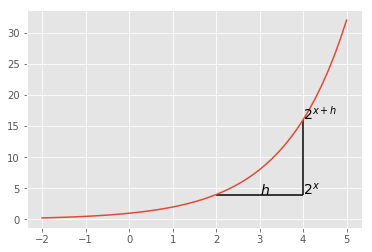

In [89]:
xs = np.linspace(-2,5)
ys = 2**xs
plt.plot(xs,ys)
plt.hlines(4,xmin=2,xmax=4)
plt.vlines(4,ymin=4,ymax=16)
plt.annotate("$h$",xy=(3,4),fontsize=14)
plt.annotate("$2^{x+h}$",xy=(4,16),fontsize=14)
plt.annotate("$2^{x}$",xy=(4,4),fontsize=14);


$\dfrac{\text{d}}{\text{d}x}2^x=\lim_{h\to 0}\dfrac{2^{x+h}-2^x}{h}$


$\begin{aligned}
&=\dfrac{2^x2^h-2^x}{h}\\
&=\dfrac{2^x(2^h-1)}{h}\\
&=2^x\dfrac{2^h-1}{h}\text{ as }h\to 0
\end{aligned}$

So the derivative of $2^x$ is $2^x$ times some number.

> Use the `limit` function again to find $\lim_{h\to 0}\dfrac{2^h-1}{h}$.


In [97]:
h = Symbol('h')
limit((2**h-1)/h,h,0)

In [98]:
N(limit((2**h-1)/h,h,0))

In other words the gradient of $2^x$ is just slightly less than $2^x$

> Confirm this in [desmos](http://desmos.com) by plotting $f(x)=2^x$ and $y=f'(x)$

> How does $3^x$ compare to the derivative of $3^x$? (You can use [desmos](http://desmos.com) or try the limit function with $2$ instead of $3$)

In [111]:
N(limit((3**h-1)/h,h,0))

The gradient of $3^x$ is very slightly *more* than $3^x$

Somewhere between $2$ and $3$ is a number for which the gradient of $a^x$ is just $a^x$

> Use a slider in desmos, or trial and improvement in the limit function to find that number

In [112]:
N(limit((2.7182**h-1)/h,h,0))

In other words, $e$ has this unique property:

**the derivative of $e^x$ is $e^x$**

This property, that the rate of change of this value is equal to its present value means, $e^x$ comes up all the time in models of population growth (or decay).

For example, [flies and radioactivity](http://pmt.physicsandmathstutor.com/download/Maths/A-level/C3/Worksheets-Notes/Solomon/C3%20Exponentials%20and%20Logarithms%20B%20-%20Questions.pdf) (Q5 and Q1).

But there's more...

## The logarithm to base $e$

These two statements are equivalent
$\begin{aligned}
y&=\log_e{x}\\
x&=e^y
\end{aligned}$

We can differentiate with respect to $y$ for a change

$\begin{aligned}
x&=e^y\\
\dfrac{\text{d}x}{\text{d}y}&=e^y\\
\end{aligned}$

But that means

$\dfrac{\text{d}x}{\text{d}y}=x$

Or equivalently

$\dfrac{\text{d}y}{\text{d}x}=\dfrac{1}{x}$


Putting that together

$\begin{aligned}
y&=\log_e{x}\\
\dfrac{\text{d}y}{\text{d}x}&=\dfrac{1}{x}
\end{aligned}$

The missing integral!

The logarithm to base $e$ is important enough to get its own notation, written $\ln{x}$.